<a href="https://colab.research.google.com/github/rbdlm/Covid/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações - Cintia

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import statistics as st
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import timedelta as dt
import re
from collections import Counter
from scipy.stats import t,norm

## Dataset e Limpeza - Rose

In [5]:
df = pd.read_csv('/content/drive/My Drive/Datasets/COVID19_line_list_data.csv')
df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_covid = df.copy()
df_covid.drop(df_covid.columns[[0, 1, 3, 4, 5, 10, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]], axis=1, inplace=True)
df_covid.dropna(inplace=True)
df_covid.reset_index(drop=True, inplace=True)

df_covid['reporting date'] = pd.to_datetime(df_covid['reporting date'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['symptom_onset'] = pd.to_datetime(df_covid['symptom_onset'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['hosp_visit_date'] = pd.to_datetime(df_covid['hosp_visit_date'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['exposure_start'] = pd.to_datetime(df_covid['exposure_start'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')
df_covid['exposure_end'] = pd.to_datetime(df_covid['exposure_end'].apply(lambda x: re.sub(r'/20$','/2020', x)), format='%m/%d/%Y')

df_covid['exposure_duration'] = df_covid['exposure_end'] - df_covid['exposure_start']
df_covid['symptom_hospital'] = df_covid['hosp_visit_date'] - df_covid['symptom_onset']
df_covid['reporting'] = df_covid['reporting date'] - df_covid['hosp_visit_date']
df_covid.drop(df_covid[['exposure_end', 'exposure_start', 'hosp_visit_date', 'symptom_onset', 'reporting date', 'death']], axis=1, inplace=True)

df_covid['exposure_duration'] = df_covid['exposure_duration'].dt.days.astype('int16')
df_covid['symptom_hospital'] = df_covid['symptom_hospital'].dt.days.astype('int16')
df_covid['reporting'] = df_covid['reporting'].dt.days.astype('int16')
df_covid

,country,gender,age,exposure_duration,symptom_hospital,reporting
0,China,male,66.0,6,8,9
1,China,male,37.0,1,6,1
2,China,male,39.0,1,5,7
3,China,male,56.0,8,4,1
4,China,female,18.0,5,1,1
5,China,female,32.0,4,5,1
6,China,male,45.0,3,2,1
7,China,female,50.0,2,8,0
8,China,male,43.0,6,3,2
9,China,male,42.0,3,1,2


## Tabelas e Gráficos - Rose

### Country

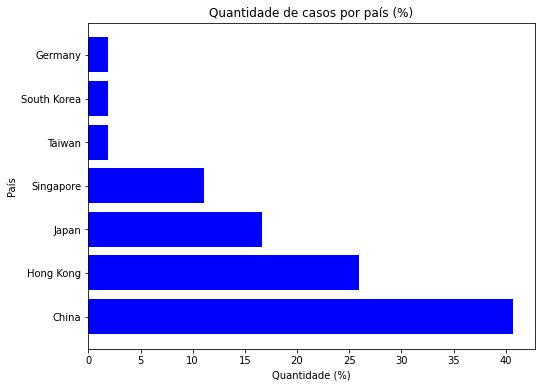




+-------------+---------------+------------+
|      Cidade | Proporção (%) | Quantidade |
+-------------+---------------+------------+
|       China |         40.74 |         22 |
|   Hong Kong |         25.93 |         14 |
|       Japan |         16.67 |          9 |
|   Singapore |         11.11 |          6 |
|      Taiwan |          1.85 |          1 |
| South Korea |          1.85 |          1 |
|     Germany |          1.85 |          1 |
+-------------+---------------+------------+


In [8]:
country = df_covid['country'].value_counts()

y_axis = [round(result/sum(country.values)*100,2) for result in country.values]
x_axis = list(country.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(8, 6))
plt.barh(x_axis, y_axis, color=bar_color, align='center')
plt.title('Quantidade de casos por país (%)')
plt.xlabel('Quantidade (%)')
plt.ylabel('País')
plt.show()

print('\n\n')

x = PrettyTable(['Cidade', 'Proporção (%)', 'Quantidade'])
x.align['Cidade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(country.index, country.values):
  x.add_row([item, round(value/sum(country.values)*100,2), value])

print(x)

### Gender

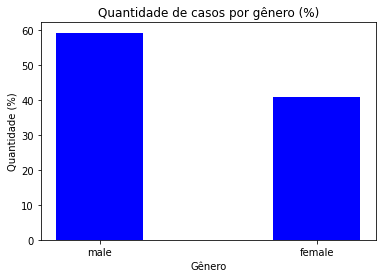




+--------+---------------+------------+
| Gênero | Proporção (%) | Quantidade |
+--------+---------------+------------+
|   male |         59.26 |         32 |
| female |         40.74 |         22 |
+--------+---------------+------------+


In [9]:
gender = df_covid['gender'].value_counts()

y_axis = [round(result/sum(gender.values)*100,2) for result in gender.values]
x_axis = list(gender.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.title('Quantidade de casos por gênero (%)')
plt.ylabel('Quantidade (%)')
plt.xlabel('Gênero')
plt.show()

print('\n\n')

x = PrettyTable(['Gênero', 'Proporção (%)', 'Quantidade'])
x.align['Gênero'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(gender.index, gender.values):
  x.add_row([item, round(value/sum(gender.values)*100,2), value])

print(x)

### Age

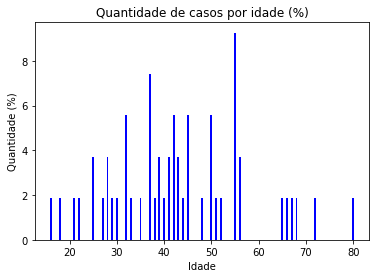




+-------+---------------+------------+
| Idade | Proporção (%) | Quantidade |
+-------+---------------+------------+
|  55.0 |          9.26 |          5 |
|  37.0 |          7.41 |          4 |
|  50.0 |          5.56 |          3 |
|  42.0 |          5.56 |          3 |
|  32.0 |          5.56 |          3 |
|  45.0 |          5.56 |          3 |
|  43.0 |           3.7 |          2 |
|  25.0 |           3.7 |          2 |
|  41.0 |           3.7 |          2 |
|  28.0 |           3.7 |          2 |
|  56.0 |           3.7 |          2 |
|  39.0 |           3.7 |          2 |
|  18.0 |          1.85 |          1 |
|  22.0 |          1.85 |          1 |
|  29.0 |          1.85 |          1 |
|  30.0 |          1.85 |          1 |
|  16.0 |          1.85 |          1 |
|  44.0 |          1.85 |          1 |
|  33.0 |          1.85 |          1 |
|  21.0 |          1.85 |          1 |
|  40.0 |          1.85 |          1 |
|  65.0 |          1.85 |          1 |
|  35.0 |          1.8

In [12]:
age = df_covid['age'].value_counts()

y_axis = [round(result/sum(age.values)*100,2) for result in age.values]
x_axis = list(age.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.title('Quantidade de casos por idade (%)')
plt.ylabel('Quantidade (%)')
plt.xlabel('Idade')
plt.show()

print('\n\n')

x = PrettyTable(['Idade', 'Proporção (%)', 'Quantidade'])
x.align['Idade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(age.index, age.values):
  x.add_row([item, round(value/sum(age.values)*100,2), value])

print(x)

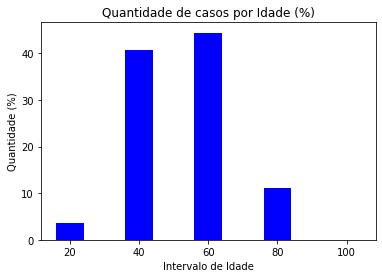




+-------+---------------+------------+
| Idade | Proporção (%) | Quantidade |
+-------+---------------+------------+
|    20 |           3.7 |          2 |
|    40 |         40.74 |         22 |
|    60 |         44.44 |         24 |
|    80 |         11.11 |          6 |
|   100 |           0.0 |          0 |
+-------+---------------+------------+


In [13]:
old_value = 0
intervals = {}
for i in range(20,120,20):
  intervals[str(i)] = df_covid[(df_covid['age'] <= i) & (df_covid['age'] > old_value)]['age'].count()
  old_value = i


y_axis = [round(value/sum(intervals.values())*100,2) for value in intervals.values() ]
x_axis = list(intervals.keys()) 
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(6, 4))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.title('Quantidade de casos por Idade (%)')
plt.xlabel('Intervalo de Idade')
plt.ylabel('Quantidade (%)')
plt.show()

print('\n\n')

x = PrettyTable(['Idade', 'Proporção (%)', 'Quantidade'])
x.align['Idade'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in intervals.items():
  x.add_row([item, round(value/sum(intervals.values())*100,2), value])

print(x)

## Exposure Duration

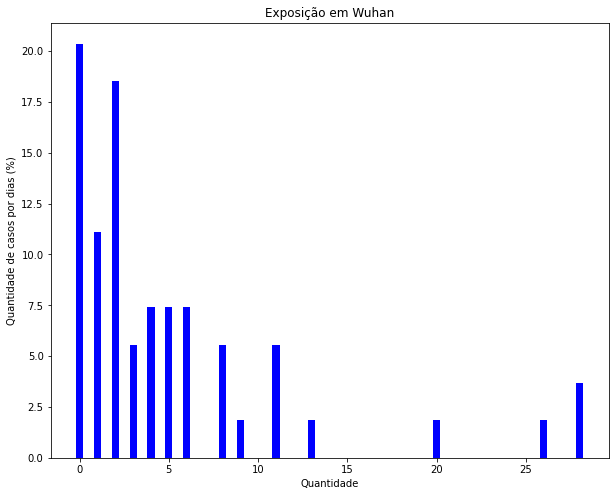




+------+---------------+------------+
| Dias | Proporção (%) | Quantidade |
+------+---------------+------------+
|    0 |         20.37 |         11 |
|    2 |         18.52 |         10 |
|    1 |         11.11 |          6 |
|    6 |          7.41 |          4 |
|    5 |          7.41 |          4 |
|    4 |          7.41 |          4 |
|   11 |          5.56 |          3 |
|    8 |          5.56 |          3 |
|    3 |          5.56 |          3 |
|   28 |           3.7 |          2 |
|   26 |          1.85 |          1 |
|   20 |          1.85 |          1 |
|   13 |          1.85 |          1 |
|    9 |          1.85 |          1 |
+------+---------------+------------+


In [ ]:
expo = df_covid['exposure_duration'].value_counts()

y_axis = [round(result/sum(expo.values)*100,2) for result in expo.values]
x_axis = list(expo.index)
width_n = 0.4
bar_color = 'blue'

plt.figure(figsize=(10, 8))
plt.bar(x_axis, y_axis, color=bar_color, width = width_n, align='center')
plt.title('Exposição em Wuhan')
plt.ylabel('Quantidade de casos por dias (%)')
plt.xlabel('Quantidade')
plt.show()

print('\n\n')

x = PrettyTable(['Dias', 'Proporção (%)', 'Quantidade'])
x.align['Dias'] = 'r'
x.align['Proporção (%)'] = 'r'
x.align['Quantidade'] = 'r'
x.padding_width = 1

for item, value in zip(expo.index, expo.values):
  x.add_row([item, round(value/sum(expo.values)*100,2), value])

print(x)

## Symptom Hospital

## Reporting

## Dados Estatísticos - Pablo

In [28]:
def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

### Idade

Média aritmética:  42.89


Mediana:  42.0


Moda:  55.0


Variância:  199.19
Desvio Padrão:  14.11
Coeficiente de Variação:  32.91


Quartil:  [16.   32.25 42.   51.75 80.  ]




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


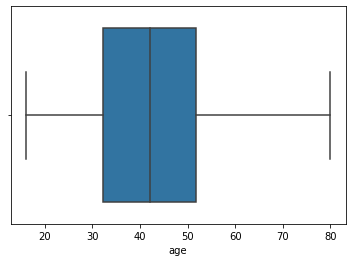

In [29]:
print('Média aritmética: ', round(st.mean(df_covid['age']),2))
print('\n')
print('Mediana: ', st.median(df_covid['age']))
print('\n')
print('Moda: ', st.mode(df_covid['age']))
print('\n')
print('Variância: ', round(st.variance(df_covid['age']),2))
print('Desvio Padrão: ', round(st.stdev(df_covid['age']),2))
print('Coeficiente de Variação: ', cv(df_covid['age']))
print('\n')
print('Quartil: ', np.quantile(df_covid['age'], [0, 0.25, 0.5, 0.75, 1]))

print('\n')

# print(stats.describe(df_covid['age']))

sns.boxplot(df_covid['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


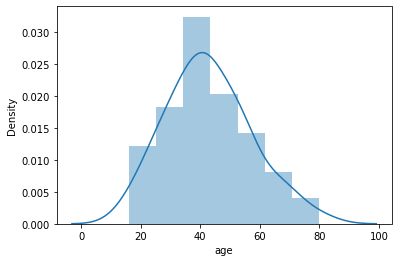

In [26]:
sns.distplot(df_covid['age'],kde=True)

In [21]:
df_covid['age'].kurtosis()

-0.04586705396497326

### Exposure Duration

Média aritmética:  5.11


Mediana:  2.5


Moda:  0


Variância:  45.65
Desvio Padrão:  6.76
Coeficiente de Variação:  132.19


Quartil:  [ 0.   1.   2.5  6.  28. ]




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


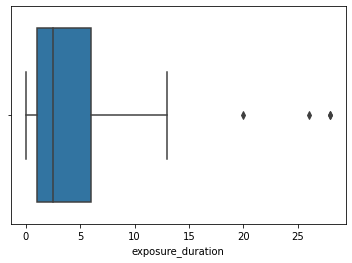

In [ ]:
print('Média aritmética: ', round(st.mean(df_covid['exposure_duration']),2))
print('\n')
print('Mediana: ', st.median(df_covid['exposure_duration']))
print('\n')
print('Moda: ', st.mode(df_covid['exposure_duration']))
print('\n')
print('Variância: ', round(st.variance(df_covid['exposure_duration']),2))
print('Desvio Padrão: ', round(st.stdev(df_covid['exposure_duration']),2))
print('Coeficiente de Variação: ', cv(df_covid['exposure_duration']))
print('\n')
print('Quartil: ', np.quantile(df_covid['exposure_duration'], [0, 0.25, 0.5, 0.75, 1]))

print('\n')

sns.boxplot(df_covid['exposure_duration'])

Curtose

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


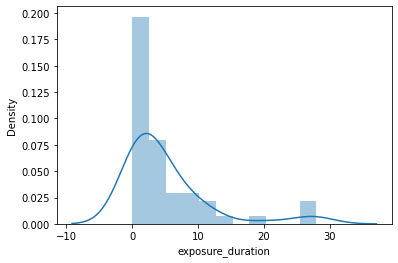

In [23]:
sns.distplot(df_covid['exposure_duration'],kde=True)

In [19]:
df_covid['exposure_duration'].kurtosis()


5.0021660751516865

### Symptom Hospital

Média aritmética:  3.74


Mediana:  3.0


Moda:  Counter({1: 9, 0: 9, 5: 6, 2: 6, 3: 6, 8: 4, 4: 4, 9: 4, 6: 3, 7: 1, 11: 1, 13: 1})


Variância:  10.8
Desvio Padrão:  3.29
Coeficiente de Variação:  87.85


Quartil:  [ 0.    1.    3.    5.75 13.  ]




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


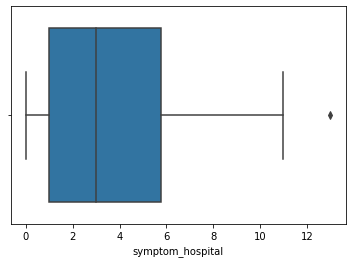

In [31]:
print('Média aritmética: ', round(st.mean(df_covid['symptom_hospital']),2))
print('\n')
print('Mediana: ', st.median(df_covid['symptom_hospital']))
print('\n')
print('Moda: ', Counter(df_covid['symptom_hospital']))
print('\n')
print('Variância: ', round(st.variance(df_covid['symptom_hospital']),2))
print('Desvio Padrão: ', round(st.stdev(df_covid['symptom_hospital']),2))
print('Coeficiente de Variação: ', cv(df_covid['symptom_hospital']))
print('\n')
print('Quartil: ', np.quantile(df_covid['symptom_hospital'], [0, 0.25, 0.5, 0.75, 1]))

print('\n')

# print(stats.describe(df_covid['age']))

sns.boxplot(df_covid['symptom_hospital'])

Curtose

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


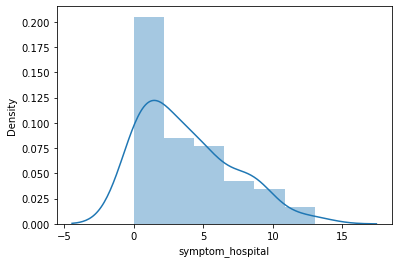

In [32]:
sns.distplot(df_covid['symptom_hospital'])

In [ ]:
df_covid['symptom_hospital'].kurtosis()

-0.09087066087644846

### Reporting

Média aritmética:  3.28


Mediana:  2.0


Moda:  1


Variância:  11.56
Desvio Padrão:  3.4
Coeficiente de Variação:  103.74


Quartil:  [ 0.  1.  2.  4. 13.]




/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


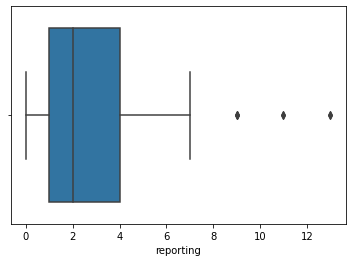

In [34]:
print('Média aritmética: ', round(st.mean(df_covid['reporting']),2))
print('\n')
print('Mediana: ', st.median(df_covid['reporting']))
print('\n')
print('Moda: ', st.mode(df_covid['reporting']))
print('\n')
print('Variância: ', round(st.variance(df_covid['reporting']),2))
print('Desvio Padrão: ', round(st.stdev(df_covid['reporting']),2))
print('Coeficiente de Variação: ', cv(df_covid['reporting']))
print('\n')
print('Quartil: ', np.quantile(df_covid['reporting'], [0, 0.25, 0.5, 0.75, 1]))

print('\n')


sns.boxplot(df_covid['reporting'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


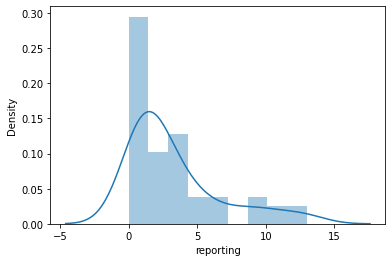

In [35]:

sns.distplot(df_covid['reporting'])

In [37]:
df_covid['reporting'].kurtosis()

1.5235873743224748

## Comparação - Miranda

In [36]:
x = PrettyTable(['Variável', 'Média', 'Mediana', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação', 'Outliers', 'Assimetria'])
x.align['Média'] = 'r'
x.align['Variável'] = 'r'
x.align['Mediana'] = 'r'
x.align['Variância'] = 'r'
x.align['Desvio Padrão'] = 'r'
x.align['Coeficiente de Variação'] = 'r'
x.align['Outliers'] = 'r'
x.padding_width = 1

x.add_row(['Age', '42.89', '42.0', '195.51', '13.98', '32.91', 'Não', 'Direita'])
x.add_row(['exposure duration', '5.11', '2.5', '44.8', '6.69', '132.19', 'Sim', 'Direita'])
x.add_row(['symptom hospital', '3.74', '3.0', '10.6', '3.26', '87.85', 'Sim', 'Direita'])
x.add_row(['reporting', '3.28', '2.0', '11.35', '3.37', '103.74', 'Sim', 'Direita'])

print(x)

+-------------------+-------+---------+-----------+---------------+-------------------------+----------+------------+
|          Variável | Média | Mediana | Variância | Desvio Padrão | Coeficiente de Variação | Outliers | Assimetria |
+-------------------+-------+---------+-----------+---------------+-------------------------+----------+------------+
|               Age | 42.89 |    42.0 |    195.51 |         13.98 |                   32.91 |      Não |  Direita   |
| exposure duration |  5.11 |     2.5 |      44.8 |          6.69 |                  132.19 |      Sim |  Direita   |
|  symptom hospital |  3.74 |     3.0 |      10.6 |          3.26 |                   87.85 |      Sim |  Direita   |
|         reporting |  3.28 |     2.0 |     11.35 |          3.37 |                  103.74 |      Sim |  Direita   |
+-------------------+-------+---------+-----------+---------------+-------------------------+----------+------------+


In [38]:
df_covid.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,54.0,42.888889,14.113645,16.0,32.25,42.0,51.75,80.0
exposure_duration,54.0,5.111111,6.756315,0.0,1.00,2.5,6.00,28.0
symptom_hospital,54.0,3.740741,3.286250,0.0,1.00,3.0,5.75,13.0
reporting,54.0,3.277778,3.400425,0.0,1.00,2.0,4.00,13.0


Intervalo de Confiança - Age

In [39]:
inf, sup = norm.interval(0.95, loc=round(st.mean(df_covid['age']),2), scale=round(st.stdev(df_covid['age']),2)/np.sqrt(len(df_covid['age'])))
print('Limite inferior:', round(inf,3))
print('Limite superior:', round(sup,3))

Limite inferior: 39.127
Limite superior: 46.653


Intervalo de Confiança - exposure duratio

In [40]:
print("Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida")                                              
inf, sup = norm.interval(0.95, loc=round(st.mean(df_covid['exposure_duration']),2), scale=round(st.stdev(df_covid['exposure_duration']),2)/np.sqrt(len(df_covid['exposure_duration']
                                                                                    )))
print('Limite inferior:', round(inf,3))
print('Limite superior:', round(sup,3))

Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida
Limite inferior: 3.307
Limite superior: 6.913


Intervalo de Confiança - symptom hospital

In [41]:
print("Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida")                                              
inf, sup = norm.interval(0.95, loc=round(st.mean(df_covid['symptom_hospital']),2), scale=round(st.stdev(df_covid['symptom_hospital']),2)/np.sqrt(len(df_covid['symptom_hospital'])))
print('Limite inferior:', round(inf,3))
print('Limite superior:', round(sup,3))

Intervalo de Confiança ao nível de 95% para média quando a variância é conhecida
Limite inferior: 2.863
Limite superior: 4.617


Intervalo de Confiança - reporting

In [42]:
inf, sup = norm.interval(0.95, loc=round(st.mean(df_covid['reporting']),2), scale=round(st.stdev(df_covid['reporting']),2)/np.sqrt(len(df_covid['reporting'])))
print('Limite inferior:', round(inf,3))
print('Limite superior:', round(sup,3))

Limite inferior: 2.373
Limite superior: 4.187
